# Code

EV aggregator implementation based on State Space Model.

### EV SSM Class

In [1]:
from ev_ssm import ev_ssm

In [2]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")

EVA: ts=10[H], 10000 EVs, Total Q=250.12 MWh
Online 1983, Q=49.73 MWh, SoC=0.9834
Power(MW): Pt=-0.3613, Pc=-0.3613, Pd=-0.0
Ctrl: 0=1921; 1=62; 


In [3]:
sse.run(tf=10.1)

EVA MCS: 100%|██████████| 36/36 [00:14<00:00,  2.46it/s]


(<Figure size 3600x1800 with 2 Axes>,
 <AxesSubplot:title={'center':'EVA'}, xlabel='Time [H]', ylabel='Power (MW)'>)

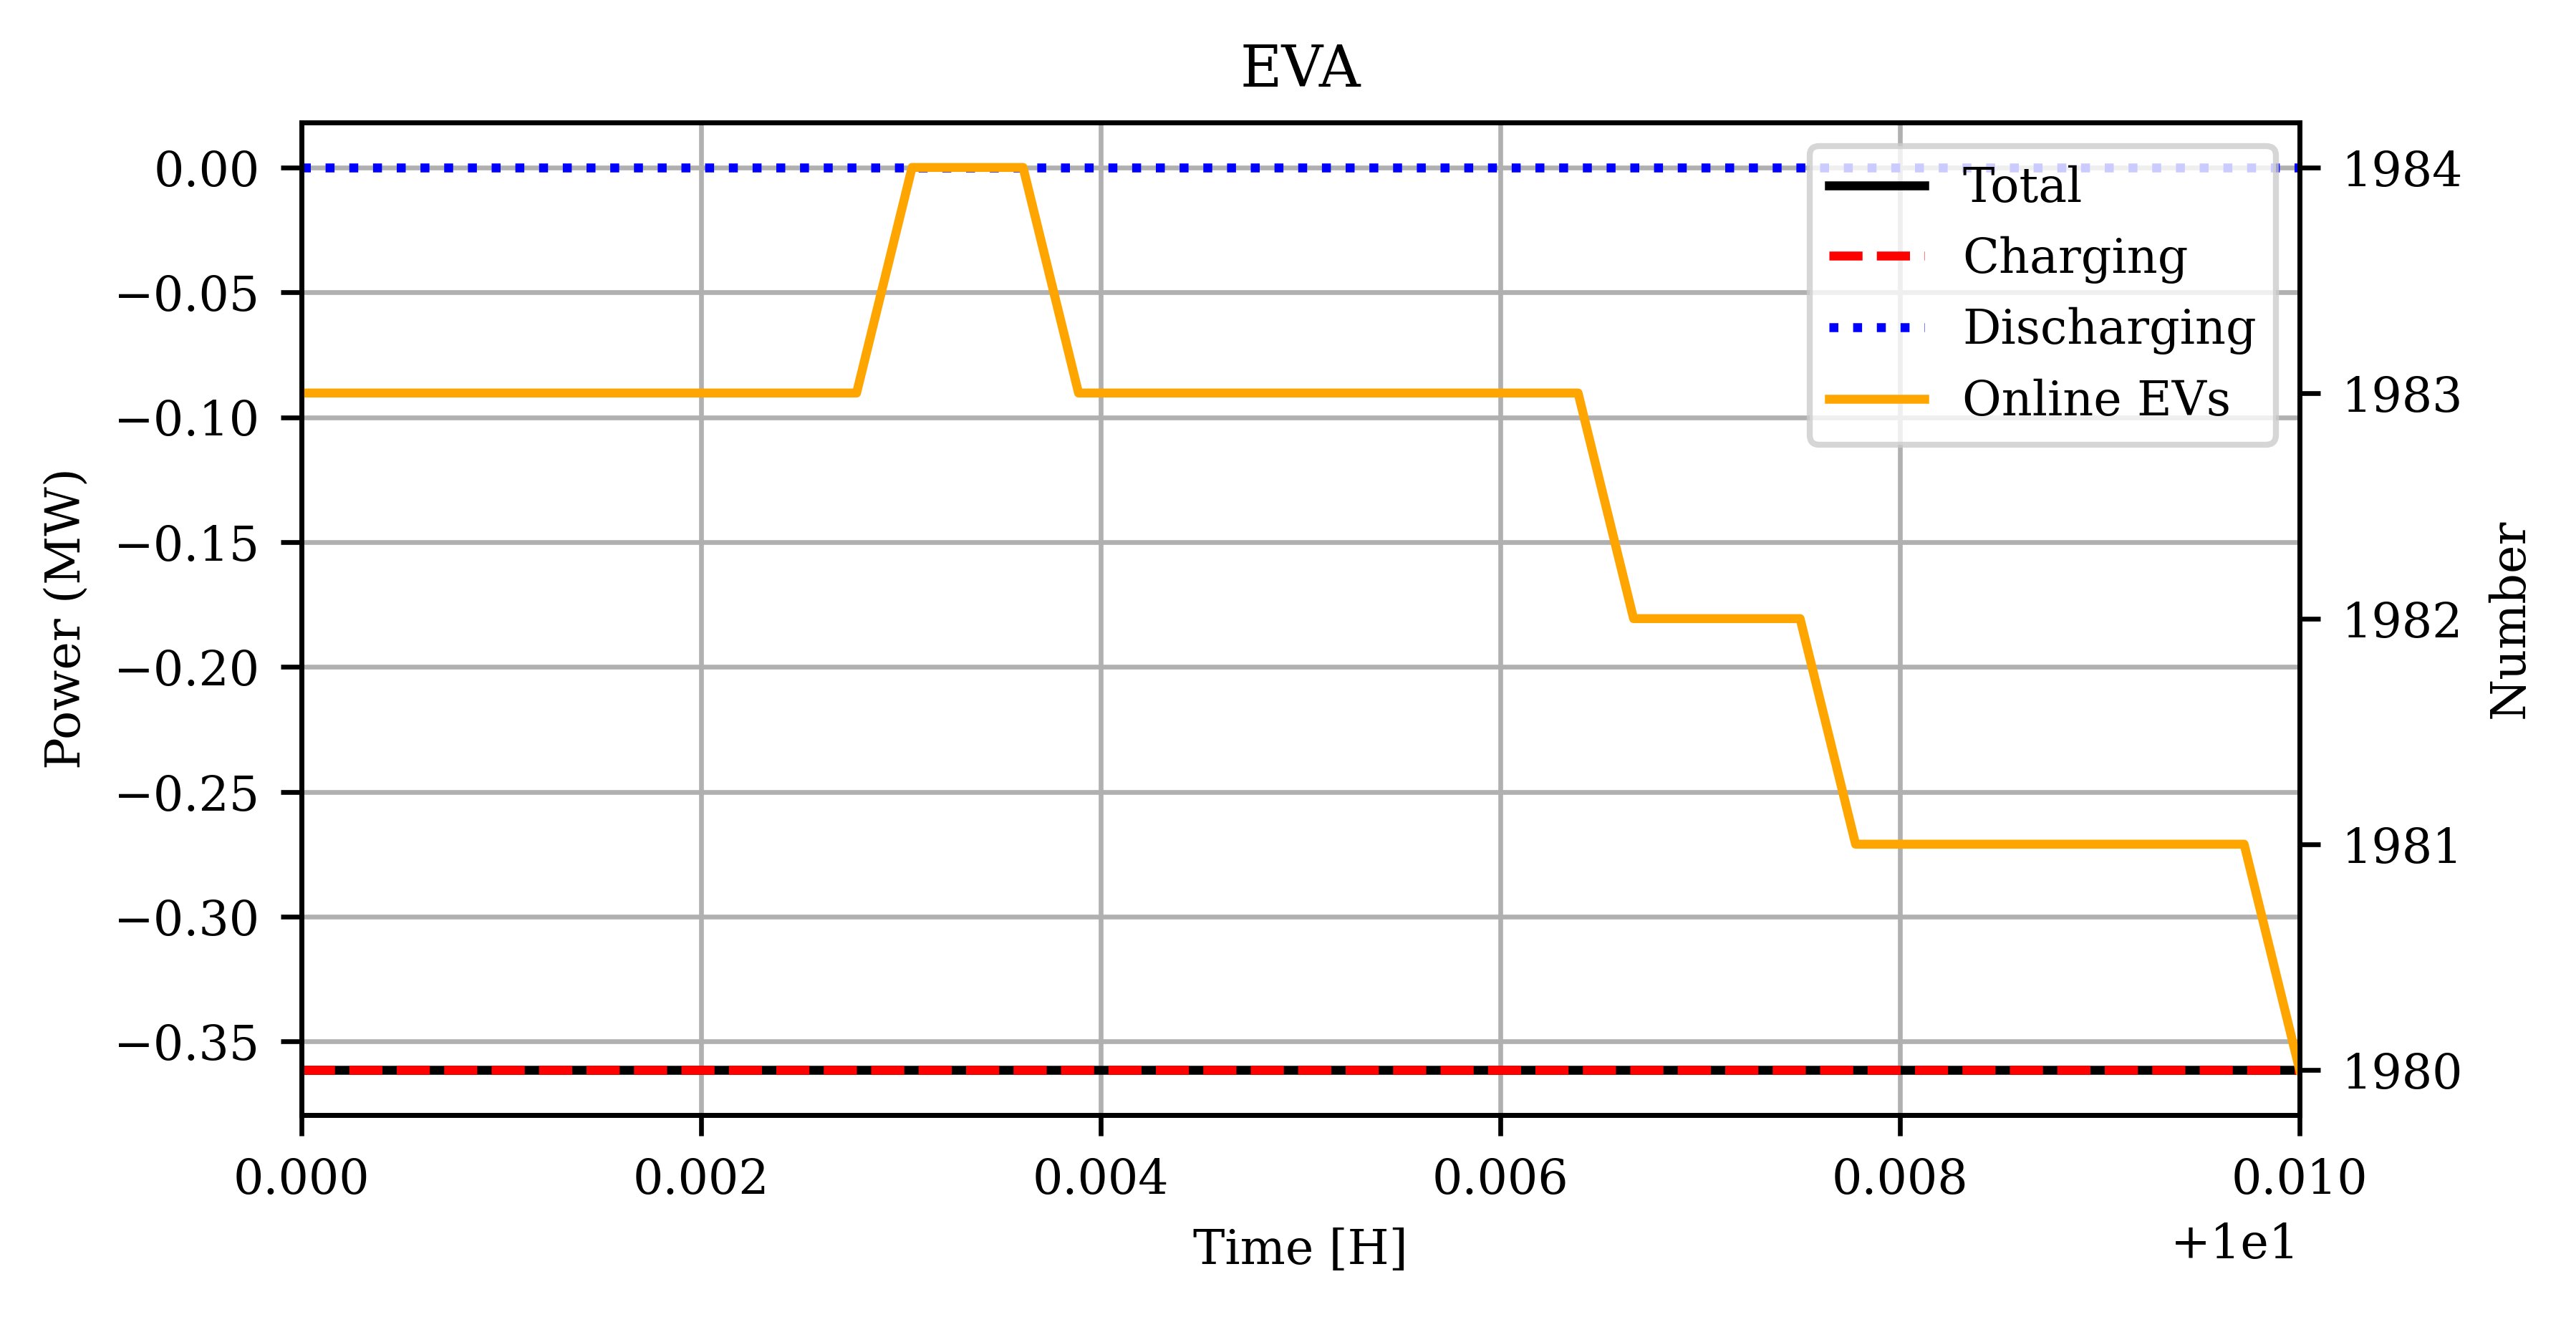

In [4]:
sse.plot()

### BUG

1. To response a large AGC, all the EVs should be switched to DS, but now some remains IS.
2. The logic of action may need improvement?

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")

u, v, us, vs = sse.r_agc(Pi=5)
u, v, us, vs = sse.r_agc(Pi=23)
print(sse.Pr)
sse.xtab

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")
u, v, us, vs = sse.r_agc(Pi=23)
print(sse.Pr)
sse.xtab

### Test AGC Response

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")

Pi=0
for tf in np.arange(10, 10.1, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

In [ ]:
sse.plot()

In [ ]:
sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
             lr=0.1, lp=100, seed=2022, name="EVA")
sse.load_A("Aests.csv")

Pi=0
for tf in np.arange(10, 10.01, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

Pi = 0.1
for tf in np.arange(10.01, 10.02, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

Pi = 0.05
for tf in np.arange(10.02, 10.03, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

Pi = 0.15
for tf in np.arange(10.03, 10.05, 1/3600):
    sse.run(tf=tf, Pi=Pi, is_update=True, is_record=True, is_test=False)

In [ ]:
sse.plot()

## Misc

In [ ]:
u, v, us, vs = sse.r_agc(Pi=5)
print(sse.Pr)
print(us)
print(vs)
sse.xtab

In [ ]:
cdf = pd.DataFrame(np.concatenate([u.reshape(1, 20), v.reshape(1, 20)], axis=0),
                   columns=sse.rtab.columns)

### SAC

This coeef. does not make sense?

In [ ]:
socb = np.arange(0, 1.01, 0.05)
for i in range(len(socb)-1):
    print('soc=', i, 'k=', pow(1-sse.sac(0.5*(socb[i]+socb[i+1]))[2], 20/3600/sse.Th))

In [ ]:
x = np.linspace(0, 1, 100)
sac = sse.sac(x)

plt.style.use('default')
with plt.style.context(['ieee']):
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    ax.plot(np.arange(0, 1, 0.01), sac[0], label='CS')
    ax.plot(np.arange(0, 1, 0.01), sac[1], label='IS')
    ax.plot(np.arange(0, 1, 0.01), sac[2], label='DS')
    ax.legend()
    ax.set_ylim([0, 1.01])
    ax.set_xlim([0, 1])
    ax.set_xlabel('SoC [%]')
    ax.set_ylabel('SoC Adapt. Coeff.')

### test

In [ ]:
# sse = ev_ssm(ts=10, N=10000, step=1, tp=100,
#              lr=0.1, lp=100, seed=2022, name="SSE1")

# # --- build and save A matrix ---
# sse.test(tf=10.1)
# sse.save_A("Aests.csv")

# --- load A matrix ---
# sse.load_A("Aests.csv")

# --- run MCS ---
# sse.run(tf=10.1, is_update=True, is_record=True)

# --- plot results ---
# fig, ax = sse.plot()

# --- test A matrix stability ---
# sse.g_res(x0=sse.x0.copy(), n=1000)
# print(np.sum(sse.x0))

# sse.reset(tnow=10, clean_xl=False)

# --- continually run ---
# for tf in np.arange(10, 10.1, 4/3600):
#     sse.run(tf=tf, is_update=True, is_record=True, is_test=False)

# --- spy A ---
# with plt.style.context(['ieee']):
#     fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
#     ax.spy(sse.A, markersize=4, marker='o',
#            markerfacecolor='orange', markeredgecolor='orange')
#     ax.grid(which='major', alpha=1)
#     ax.grid(which='minor', alpha=1)
#     ax.set_xlim(0, 3*sse.Ns-1)
#     ax.set_ylim(3*sse.Ns-1, 0)
#     ax.set_title("Spy of mat $A$")
#     ax.minorticks_on()

#     ax.set_xlabel('$\mathbf{x}(k)$')
#     ax.xaxis.set_label_position('top')
#     ax.set_ylabel('$\mathbf{x}(k+1)$')

### Spy An

In [ ]:
# Long enough, all the EVs will become idle.

An = np.linalg.matrix_power(sse.A, 225)

# --- spy A ---
with plt.style.context(['ieee']):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
    ax.spy(An, markersize=4, marker='o',
           markerfacecolor='orange', markeredgecolor='orange')
    ax.grid(which='major', alpha=1)
    ax.grid(which='minor', alpha=1)
    ax.set_xlim(0, 3*sse.Ns-1)
    ax.set_ylim(3*sse.Ns-1, 0)
    ax.set_title("Spy of mat $A$")
    ax.minorticks_on()

    ax.set_xlabel('$\mathbf{x}(k)$')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('$\mathbf{x}(k+1)$')

In [ ]:
# control vector validation

cl = -1*sse.rtab.iloc[1].values - sse.rtab.iloc[2].values
cu = sse.rtab.iloc[0].values + sse.rtab.iloc[1].values

u = np.zeros((20,))
v = np.zeros((20,))

# max output
u = sse.rtab.iloc[0].values
v = sse.rtab.iloc[1].values + sse.rtab.iloc[0].values

# min output
u = -1 * sse.rtab.iloc[1].values - sse.rtab.iloc[2].values
v = -1 * sse.rtab.iloc[2].values

res = sse.x0 + np.matmul(sse.B, u).reshape(-1) + np.matmul(sse.C, v).reshape(-1)

print("res check:", np.all(res >= 0))

with plt.style.context(['ieee']):
    width = 0.35
    x = np.arange(len(sse.x0))
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.bar(x - 0.5*width, sse.x0, width, label="in", color='cyan')
    ax.bar(x + 0.5*width, res, width, label="out", color='orange')
    ax.set_xlim(0, 59)
    ax.set_ylim(-0.0, 0.01)
    ax.legend(['x0', 'x0+ctrl'])